In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 数据抽取

In [7]:
import pandas as pd

In [8]:
df1 = pd.read_csv('2019-Nov.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2019-Nov.csv'

In [8]:
df2 = pd.read_csv('2019-Oct.csv')

In [9]:
df=pd.concat([df1,df2])

In [2]:
train=df.sample(n=10000)

NameError: name 'df' is not defined

In [13]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
23246316,2019-11-13 20:38:32 UTC,view,27700714,2053013560086233771,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
4713333,2019-10-04 16:48:44 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
52190582,2019-11-21 15:53:43 UTC,view,1005212,2053013555631882655,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
59029472,2019-11-26 03:45:24 UTC,view,1005158,2053013555631882655,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
3574707,2019-10-04 01:05:43 UTC,view,5100738,2053013553341792533,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


In [1]:
train.to_csv('training set.csv',index=0,sep=',')

NameError: name 'train' is not defined

# Data Preprocessing

In [3]:
train=pd.read_csv('training set.csv')

NameError: name 'pd' is not defined

In [18]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,20,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,16,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,15,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,03,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,01,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
9995,11,view,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9996,05,view,13200459,2.053010e+18,furniture.bedroom.bed,NaN,808.23,522335319,d62fa404-472f-4d16-86e3-30873252a804
9997,13,view,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac
9998,04,view,26400540,2.053010e+18,NaN,NaN,277.74,575758552,fa55009e-b22a-46f4-9ce6-9711fdba6634


In [19]:
train 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,20,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,16,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,15,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,03,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,01,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
9995,11,view,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9996,05,view,13200459,2.053010e+18,furniture.bedroom.bed,NaN,808.23,522335319,d62fa404-472f-4d16-86e3-30873252a804
9997,13,view,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac
9998,04,view,26400540,2.053010e+18,NaN,NaN,277.74,575758552,fa55009e-b22a-46f4-9ce6-9711fdba6634


In [20]:
temp_1 = []
temp_2 = []
temp_3 = []
temp_4 = []

for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
        temp_1.append(i)
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
        temp_2.append(i)
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
        temp_3.append(i)
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'
        temp_4.append(i)

In [21]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc


In [22]:
train=train.dropna()
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,view,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,view,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,view,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,view,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,view,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...,...
9992,afternoon,view,21406908,2.053010e+18,electronics.clocks,tissot,391.26,513857219,5686b42e-5891-414d-bb05-49b05f3212c5
9994,evening,view,18300215,2.053010e+18,accessories.bag,xiaomi,9.76,545587056,cbe2c704-1a1c-4e17-ba5f-db9d09705065
9995,forenoon,view,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9997,afternoon,view,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac


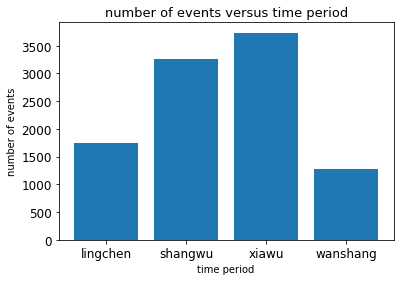

In [25]:

length1 = len(temp_1)
length2 = len(temp_2)
length3 = len(temp_3)
length4 = len(temp_4)

data = pd.DataFrame({'lingchen':[length1],'shangwu':[length2],'xiawu':[length3],'wanshang':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.show()

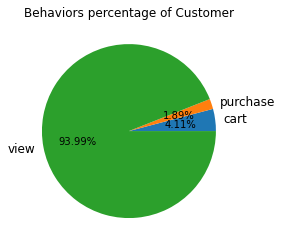

In [26]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.show()

In [158]:
train["event_time"].value_counts()

afternoon    2345
forenoon     2017
midnight     1075
evening       791
Name: event_time, dtype: int64

In [159]:
train["event_type"].value_counts()

view        5854
cart         256
purchase     118
Name: event_type, dtype: int64

In [160]:
train.describe()

,product_id,category_id,price,user_id
count,6.228000e+03,6.228000e+03,6228.000000,6.228000e+03
mean,6.051346e+06,2.055785e+18,353.794957,5.367827e+08
std,1.099331e+07,1.618725e+16,377.739536,2.107003e+07
min,1.000978e+06,2.053014e+18,0.870000,4.093218e+08
25%,1.004958e+06,2.053014e+18,109.400000,5.163127e+08
50%,1.801805e+06,2.053014e+18,217.900000,5.326556e+08
75%,5.100375e+06,2.053014e+18,460.480000,5.559821e+08
max,1.000205e+08,2.173217e+18,2574.040000,5.798982e+08


Saving figure attribute_histogram_plots


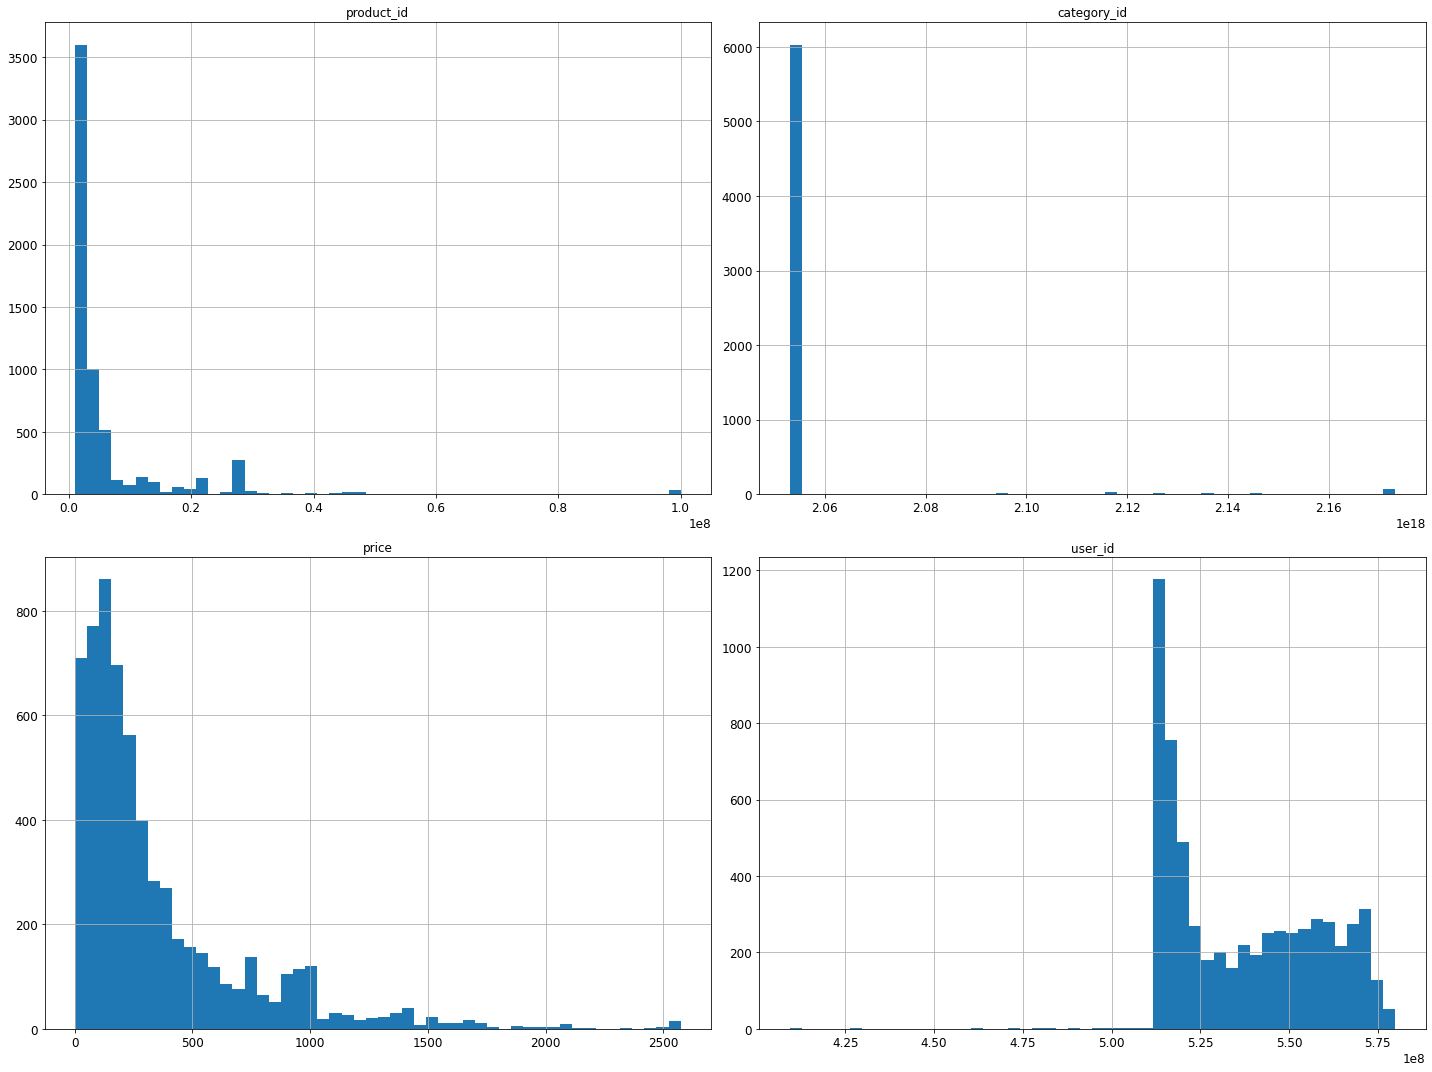

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# 分出Xtrain，Ytrain

In [28]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [29]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,evening,27700714,2.053010e+18,construction.tools.pump,magnetta,105.09,514828567,2dc7ccfb-4224-4ec1-9076-0d050606097c
1,afternoon,1004767,2.053010e+18,electronics.smartphone,samsung,252.63,512657465,d6358e16-2186-4fd0-bb5c-2e644d0e064c
2,afternoon,1005212,2.053010e+18,electronics.smartphone,samsung,175.00,571496244,e95fca70-79bb-4701-bfe0-91c57613dfd3
3,midnight,1005158,2.053010e+18,electronics.smartphone,xiaomi,282.63,573260837,aba54944-e843-48cf-87ec-80c2e9fe2ea9
4,midnight,5100738,2.053010e+18,electronics.clocks,samsung,154.16,514605532,87bca6e9-997e-4e51-837b-d9f361ee00fc
...,...,...,...,...,...,...,...,...
9992,afternoon,21406908,2.053010e+18,electronics.clocks,tissot,391.26,513857219,5686b42e-5891-414d-bb05-49b05f3212c5
9994,evening,18300215,2.053010e+18,accessories.bag,xiaomi,9.76,545587056,cbe2c704-1a1c-4e17-ba5f-db9d09705065
9995,forenoon,100003371,2.053010e+18,accessories.bag,tonybellucci,55.86,524296224,e7ef3a84-64b5-4c9f-b27c-894c0ef6a7b0
9997,afternoon,17200422,2.053010e+18,furniture.living_room.sofa,divalux,888.05,545077342,58019e66-c42c-409c-8bfc-ed724783b3ac


In [30]:
Y

0       view
1       view
2       view
3       view
4       view
        ... 
9992    view
9994    view
9995    view
9997    view
9999    view
Name: event_type, Length: 6228, dtype: object

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<Figure size 1440x1440 with 0 Axes>

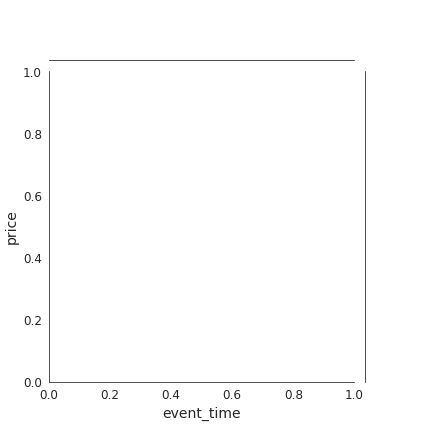

In [34]:
# hex graph
import seaborn as sns
fig = plt.figure('Graph', figsize = (20,20))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

x = train.iloc[1:,0]
y = train.iloc[1:,6]

with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

# 随机森林

In [173]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


### LabelEncoder

In [199]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [200]:
X #效果

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,1,27700714,2053013560086233771,69,281,105.09,514828567,1120
1,0,1004767,2053013555631882655,81,398,252.63,512657465,5199
2,0,1005212,2053013555631882655,81,398,175.00,571496244,5657
3,3,1005158,2053013555631882655,81,488,282.63,573260837,4163
4,3,5100738,2053013553341792533,80,398,154.16,514605532,3282
...,...,...,...,...,...,...,...,...
9992,0,21406908,2053013561579406073,80,458,391.26,513857219,2124
9994,1,18300215,2053013558945383017,0,488,9.76,545587056,4948
9995,2,100003371,2053013566209917945,0,460,55.86,524296224,5621
9997,0,17200422,2053013559792632471,95,137,888.05,545077342,2157


In [204]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

Single Tree:0.879079721776351 Random Forest:0.9341894060995185


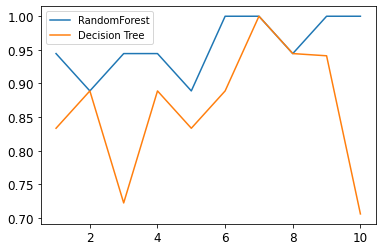

In [206]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

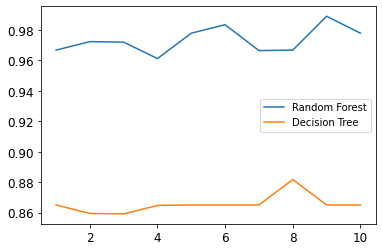

In [212]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

In [214]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9775280898876404